In [2]:


# primero todas las librerías por bloques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [3]:


# opciones de visualización
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)



In [6]:


df1 = pd.read_csv('./data/raw/Loan_test_set.csv', skiprows=[0])
df2 = pd.read_csv('./data/raw/Loan_training_set_1_4.csv', skiprows=[0])
df3 = pd.read_csv('./data/raw/Loan_training_set_2_4.csv', skiprows=[0])
df4 = pd.read_csv('./data/raw/Loan_training_set_3_4.csv', skiprows=[0])
df5 = pd.read_csv('./data/raw/Loan_training_set_4_4.csv', skiprows=[0])



In [9]:


# Tendré que juntarlo pero separando training y test
df1['test_set'] = 1
df2['test_set'] = 0
df3['test_set'] = 0
df4['test_set'] = 0
df5['test_set'] = 0



In [10]:


columns = np.dstack((list(df1.columns), list(df2.columns), list(df3.columns), list(df4.columns), list(df5.columns))) 



In [11]:


coldf = pd.DataFrame(columns[0])



In [12]:


coldf.head()



,0,1,2,3,4
0,id,id,id,id,id
1,member_id,member_id,member_id,member_id,member_id
2,loan_amnt,loan_amnt,loan_amnt,loan_amnt,loan_amnt
3,funded_amnt,funded_amnt,funded_amnt,funded_amnt,funded_amnt
4,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv


In [13]:
df = pd.concat([df1, df2, df3, df4, df5])

In [14]:


df.shape



(981665, 152)

In [15]:
print(list(df.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [16]:


df.head(5)



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,test_set
0,104046719,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,Project Leader,10+ years,MORTGAGE,82000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,672xx,KS,31.07,0.0,May-1996,725.0,729.0,0.0,NaN,NaN,18.0,0.0,69578.0,63.2%,31.0,w,11438.26,11438.26,3912.17,3912.17,2561.74,1350.43,0.0,0.0,0.0,Dec-2017,492.13,Jan-2018,Dec-2017,714.0,710.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,202617.0,0.0,3.0,0.0,1.0,22.0,34430.0,57.0,0.0,2.0,13686.0,61.0,110037.0,0.0,9.0,0.0,3.0,11257.0,29762.0,63.4,0.0,0.0,140.0,250.0,13.0,13.0,6.0,13.0,NaN,13.0,NaN,0.0,7.0,9.0,8.0,13.0,4.0,14.0,21.0,9.0,18.0,0.0,0.0,0.0,0.0,100.0,25.0,0.0,0.0,286204.0,104008.0,81400.0,60167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,104048967,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,Pilot,10+ years,MORTGAGE,215000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,067xx,CT,6.06,0.0,Jan-2004,765.0,769.0,4.0,NaN,NaN,11.0,0.0,8678.0,18.8%,16.0,f,4190.59,4190.59,1586.64,1586.64,809.41,777.23,0.0,0.0,0.0,Dec-2017,200.10,Jan-2018,Dec-2017,779.0,775.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,44754.0,1.0,3.0,2.0,4.0,7.0,35832.0,68.0,2.0,2.0,8659.0,27.0,46200.0,2.0,0.0,6.0,6.0,4069.0,37522.0,18.8,0.0,0.0,83.0,87.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,2.0,2.0,7.0,8.0,7.0,7.0,8.0,2.0,11.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,1

In [17]:
df.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()



,feature_type,count
0,int64,1
1,float64,111
2,object,40


In [18]:
# Analizar una variable concreta
df.loan_status.value_counts()

Current               500937
Fully Paid            358629
Charged Off            99099
Late (31-120 days)     13203
In Grace Period         6337
Late (16-30 days)       3414
Default                   36
Name: loan_status, dtype: int64

In [19]:
# analizar nulos
df_dtypes = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [20]:
df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
1,test_set,0,int64
0,id,0,object
2,loan_amnt,10,float64
3,tot_hi_cred_lim,10,float64
4,tot_cur_bal,10,float64
5,tot_coll_amt,10,float64
6,acc_now_delinq,10,float64
7,total_bal_ex_mort,10,float64
8,total_bc_limit,10,float64
9,total_il_high_credit_limit,10,float64


In [21]:
# Check columns have more than  400000  missing values ( ≈90% )
missing_df = df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index()

In [24]:
miss_4000 = list(missing_df[missing_df.missing_value >= 400000]['index'])


In [25]:
print(len(miss_4000))

58


In [26]:
print(sorted(miss_4000))

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

In [27]:
# también puede haber columnas duplicadas y observa cómo encapsulamos el código en FUNCIONES
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups

In [28]:
duplicate_cols = duplicate_columns(df)

In [29]:
duplicate_cols

[]

In [30]:
df.shape

(981665, 152)

In [31]:
def plot_feature(col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)

    # Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

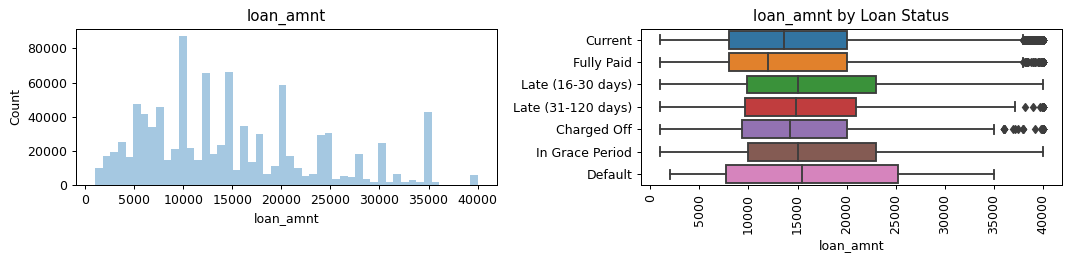

In [32]:
plot_feature('loan_amnt', True)

In [33]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,test_set
count,0.0,981655.000000,981655.000000,981655.000000,981655.000000,9.816550e+05,981361.000000,981655.000000,981655.000000,981655.000000,981655.000000,503935.000000,174205.000000,981655.000000,981655.000000,9.816550e+05,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,9.816550e+05,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,278704.000000,981655.0,2.572500e+04,25723.000000,981655.000000,9.816550e+05,9.816550e+05,346303.000000,346303.000000,346303.000000,346303.000000,336956.000000,3.463030e+05,300362.000000,346303.000000,346303.000000,346303.000000,346273.000000,9.816550e+05,346303.000000,346303.000000,346303.000000,981655.000000,981642.000000,971383.000000,970803.000000,981655.000000,981655.000000,953445.000000,981655.000000,981655.000000,981655.000000,981655.000000,971947.000000,249226.000000,878211.000000,350293.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981654.000000,981655.000000,981655.000000,939146.000000,981655.000000,981655.000000,981655.000000,981655.000000,970988.000000,981655.000000,981655.000000,9.816550e+05,9.816550e+05,9.816550e+05,9.816550e+05,21825.000000,21825.000000,21825.000000,21825.000000,21825.000000,21825.000000,21537.000000,21825.000000,21825.000000,21825.000000,21825.000000,7541.000000,3004.0,3004.000000,3004.0,3004.000000,2579.000000,3004.000000,3004.000000,8630.000000,8630.000000,8630.000000,981665.000000
mean,NaN,14963.557767,14963.557767,14958.494068,441.567492,7.766029e+04,18.878278,0.348926,694.888999,698.889131,0.595004,33.648506,69.144181,11.816029,0.230210,1.700362e+04,24.999027,5414.467766,5412.834903,10759.329230,10755.536718,8402.339152,2251.174242,9.008020e-01,104.915034,17.860589,3114.646693,687.342490,676.984434,0.019997,44.456757,1.0,1.171532e+05,18.936393,0.005909,2.532014e+02,1.421102e+05,0.903013,2.863134,0.626801,1.539759,21.321822,3.595931e+04,68.931965,1.300988,2.791010,5819.417343,58.188109,3.340459e+04,0.970200,1.451963,2.045968,4.576213,13418.176272,10139.309019,60.873200,0.010062,14.144151,127.182896,18

In [34]:
corr = df.corr(method = 'spearman')

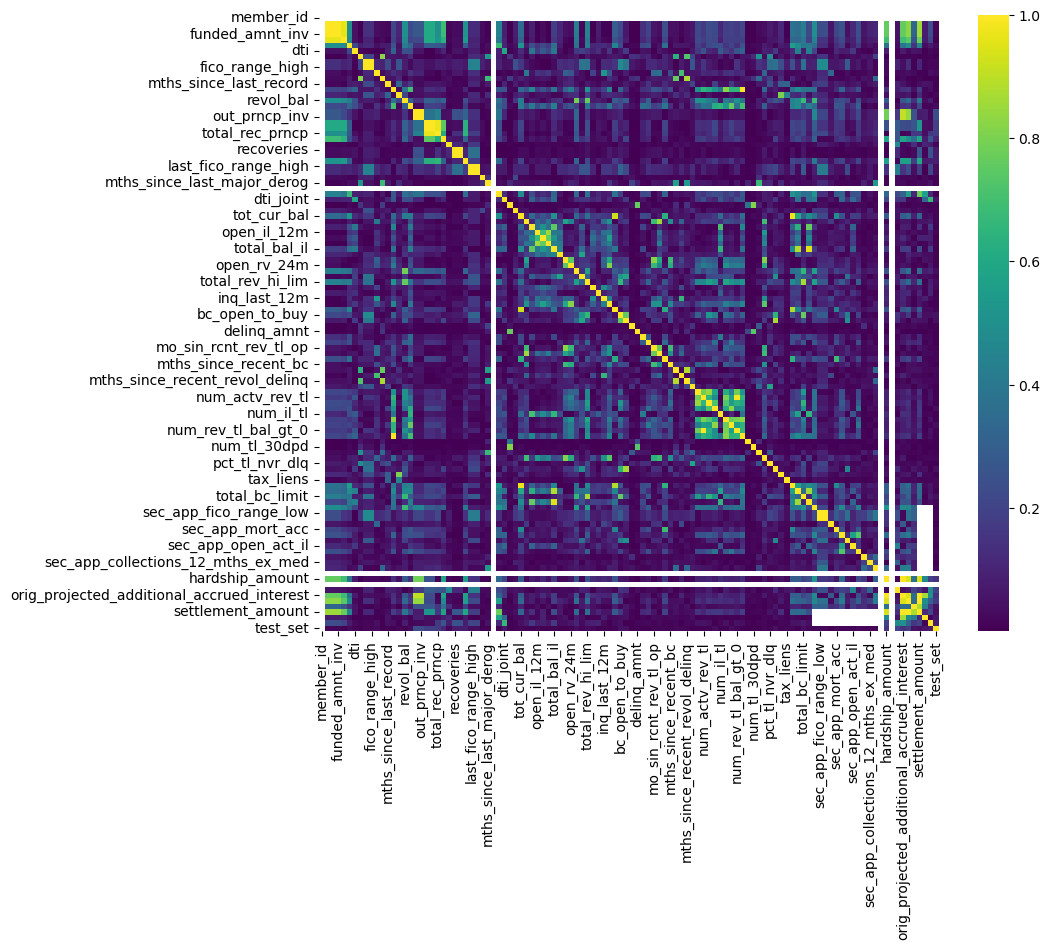

In [35]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr.abs(), cmap ='viridis' )
plt.show()

In [36]:
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

In [37]:
new_corr[new_corr.correlation > 0.6]

,level_0,level_1,correlation
223,funded_amnt,loan_amnt,1.000000
1007,fico_range_high,fico_range_low,1.000000
10101,sec_app_fico_range_high,sec_app_fico_range_low,1.000000
11763,settlement_amount,orig_projected_additional_accrued_interest,1.000000
11449,orig_projected_additional_accrued_interest,hardship_amount,1.000000
3135,last_fico_range_low,last_fico_range_high,1.000000
2015,out_prncp_inv,out_prncp,0.999999
2239,total_pymnt_inv,total_pymnt,0.999998
335,funded_amnt_inv,funded_amnt,0.999899
334,funded_amnt_inv,loan_amnt,0.999899


In [38]:


numeric_features = df.select_dtypes(include=['int32', 'int64', 'float64']).columns



In [39]:


numeric_features



Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high',
       ...
       'hardship_amount', 'hardship_length', 'hardship_dpd',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'test_set'],
      dtype='object', length=112)

In [40]:
# Histogram with Kernel Density Estimate Plot (KDE)
# Source: https://stackoverflow.com/questions/43638851/pandas-histogram-plot-with-kde
def plot_histograms(df, columns):
    # keep total number of subplot
    k = len(df.columns)
    # n = number of chart columns
    n = columns
    m = (k - 1) // n + 1
    
    # Create figure
    fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))

    # Iterate through columns, tracking the column name and 
    # which number we are at i. Within each iteration, plot
    for i, (name, col) in enumerate(df.iteritems()):
        r, c = i // n, i % n
        ax = axes[r, c]
        # the histogram
        col.hist(ax=ax)
        # kde = Kernel Density Estimate plot
        ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
        ax2.set_ylim(0)

    # Use tight_layout() as an easy way to sharpen up the layout spacing
    fig.tight_layout()


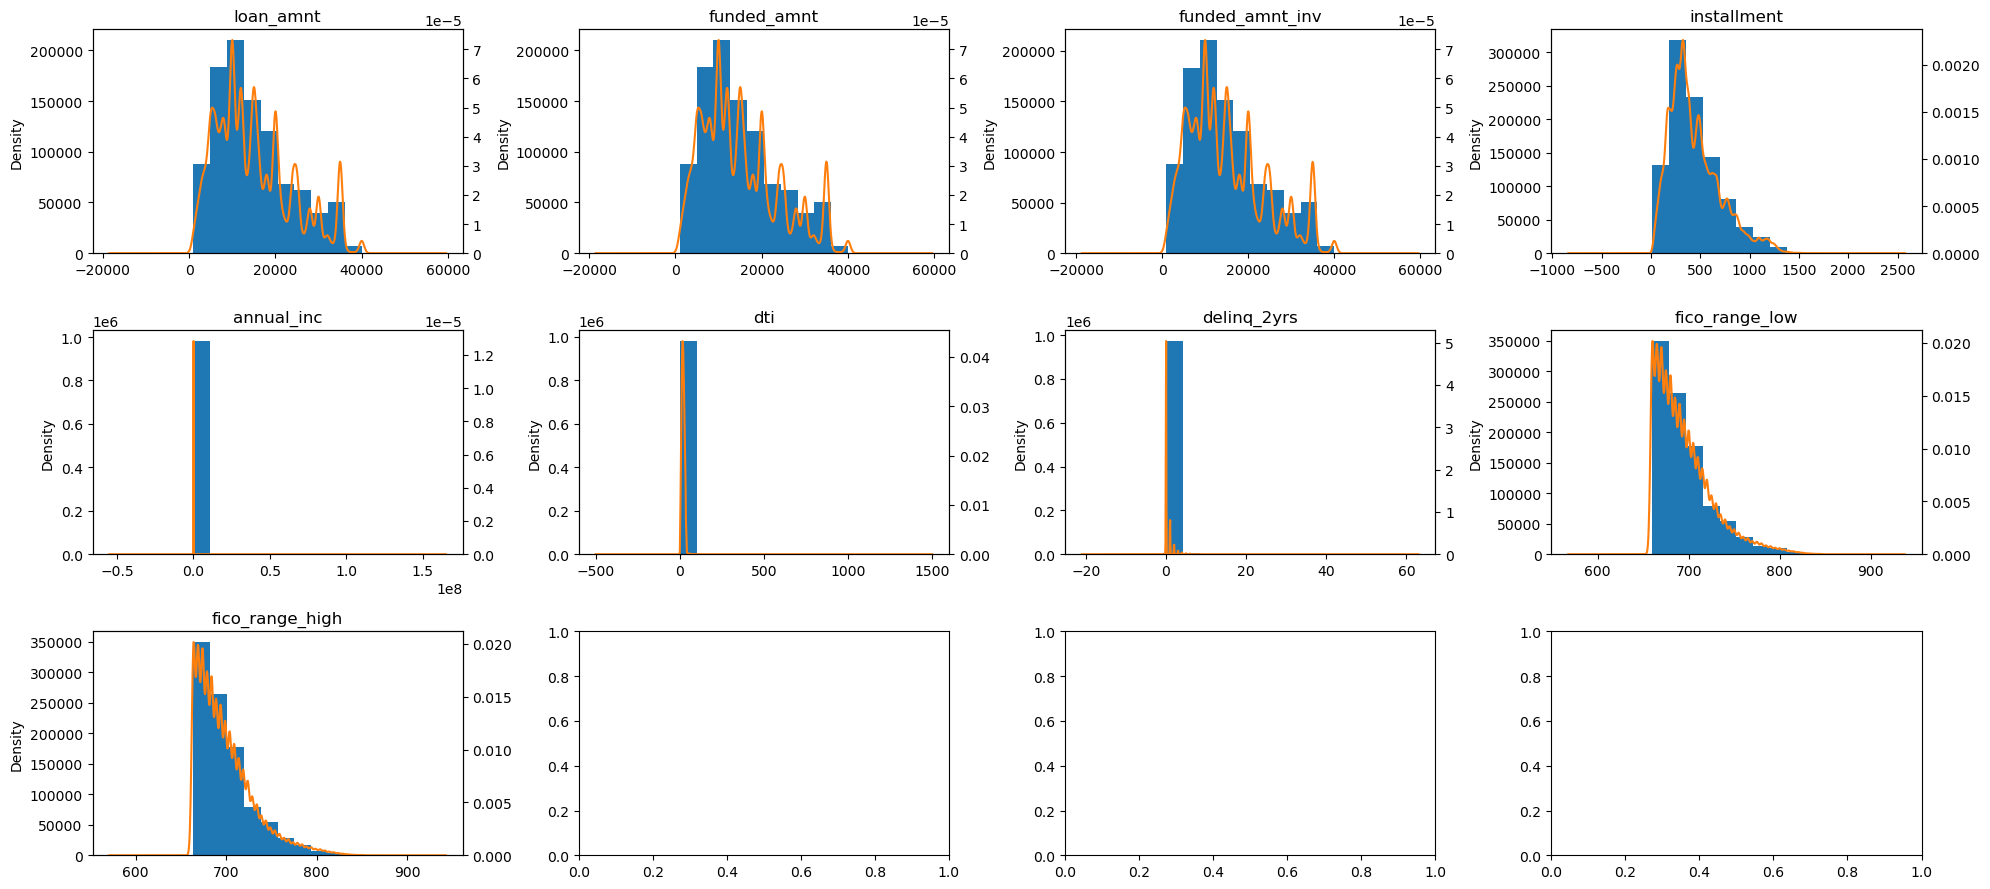

In [41]:
# selecciono algunas como ejemplo, por ejemplo, los ID no hay que incluirlos nunca en el EDA
plot_histograms(df=df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high']], columns=4)

<AxesSubplot:>

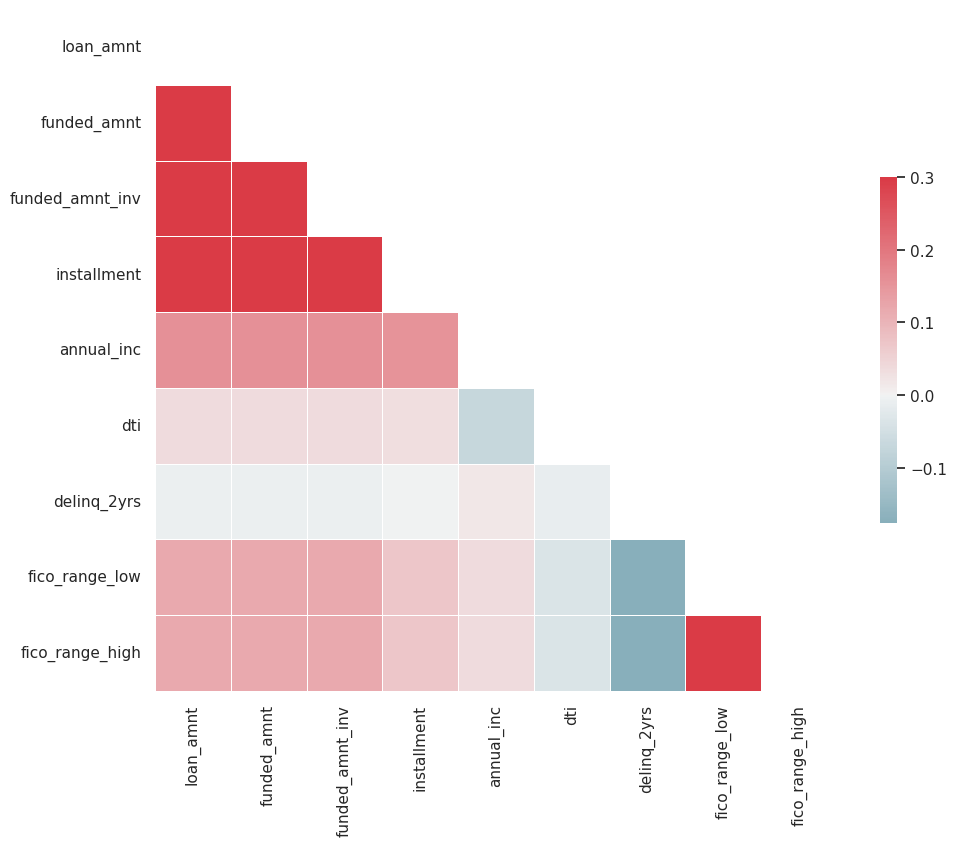

In [42]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
           'installment', 'annual_inc', 'dti', 'delinq_2yrs', 
           'fico_range_low','fico_range_high']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [43]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve

from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix


from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Combining numerical and categorical piepline into one big pipeline horizontally using ColumnTransformer
from sklearn.compose import ColumnTransformer

## No podemos utilizar TransformTargetRegression porque estamos en un modelo de clasificacion
# from 'Y' and 'N' to numeric values
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
# Leería los datos que ya los tendría preparados
df_selected = pd.read_csv('../data/df_selected.csv')

In [ ]:
# Leería los datos que ya los tendría preparados
df_selected = pd.read_csv('../data/df_selected.csv')

In [ ]:
def evaluate_model(ytest, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))

In [ ]:


df_major = df_selected[df_selected.loan_status == 0]
df_minor = df_selected[df_selected.loan_status == 1]



In [ ]:
df_minor_upsmapled = resample(df_minor, replace = True, n_samples = 358436, random_state = 12345)

In [ ]:


df_minor_upsmapled = pd.concat([df_minor_upsmapled, df_major])



In [ ]:


df_minor_upsmapled.loan_status.value_counts()



In [ ]:
df_minor_upsmapled.dtypes


In [ ]:
#Defining the steps in the numerical pipeline 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#Defining the steps in the categorical pipeline 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    
#Numerical features to pass down the numerical pipeline 
numeric_features = df_minor_upsmapled.select_dtypes(include=['int64', 'float64']).drop(['loan_status'], axis=1).columns

#Categrical features to pass down the categorical pipeline 
categorical_features = df_minor_upsmapled.select_dtypes(include=['object']).columns

In [ ]:
X = df_minor_upsmapled.drop('loan_status', axis = 1)
Y = df_minor_upsmapled.loan_status


In [ ]:
Y = LabelEncoder().fit_transform(Y)

In [ ]:


xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=0)



In [ ]:


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [ ]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(xtrain, ytrain)   
    print(classifier)
    print("model score: %.3f" % pipe.score(xtest, ytest))

In [ ]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [ ]:
### Parameter Tunning Optimization
param_grid = { 
    'classifier__n_estimators': [200], # poner tantos como se quiera probar
    'classifier__max_features': ['auto'], #['auto', 'sqrt', 'log2']
    'classifier__max_depth' : [4], # [4,5,6,7,8]
    'classifier__criterion' :['gini']} #['gini', 'entropy']

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

CV = RandomizedSearchCV(rf, param_grid, cv=10, random_state=12345, n_jobs=2)
                  
CV.fit(xtrain, ytrain)  
print(CV.best_params_)    
print(CV.best_score_)

In [ ]:
predictions = CV.predict(xtest)

In [ ]:


print("Classification Report")
print(classification_report(ytest, predictions))



In [ ]:
CV.best_estimator_.named_steps['classifier'].feature_importances_

In [ ]:
prob_predictions = CV.predict_proba(xtest)

In [ ]:


recall_score(ytest, predictions)



In [ ]:


precision_score(ytest, predictions)



In [ ]:
cm_gbt = confusion_matrix(ytest, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm_gbt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');


In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(CV, xtest, ytest,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [ ]:
# keep probabilities for the positive outcome only
yhat = prob_predictions[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(ytest, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.526249, G-Mean=0.657



In [ ]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(ytest, yhat)



In [ ]:


# plot the roc curve for the model
no_skill = len(ytest[ytest==1]) / len(ytest)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()



In [ ]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(ytest[ytest==1]) / len(ytest)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.scatter(recall[ix], precision[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [ ]:
# evaluate the model
score = f1_score(ytest, predictions)
print('F-Score: %.5f' % score)


In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_cumulative_gain(ytest, prob_predictions)
plt.show()

In [ ]:
skplt.metrics.plot_lift_curve(ytest, prob_predictions)
plt.show()

In [ ]:
# https://github.com/slundberg/shap
import shap # cada notebook tendría sus respectivos import al inicio para mejor organización

# load JS visualization code to notebook
shap.initjs()

In [ ]:


explainer = shap.TreeExplainer(CV.best_estimator_.named_steps['classifier'])



In [ ]:


preprocessor = rf.named_steps["preprocessor"]



In [ ]:
import warnings

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [ ]:
all_columns = get_feature_names(preprocessor)

In [ ]:
len(all_columns)

In [ ]:
test_data = pd.DataFrame.sparse.from_spmatrix(rf['preprocessor'].transform(xtest))

In [ ]:


test_data.columns = all_columns



In [ ]:


test_data.head()



In [ ]:


shap_values = explainer.shap_values(test_data)



In [ ]:
test_data.iloc[0,:]

In [ ]:


len(shap_values[0][0])



In [ ]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[0], shap_values[0][0], test_data.iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:100,:], features=test_data.iloc[:100, :])



In [ ]:


# summarize the effects of all the features
shap.summary_plot(shap_values, test_data)



In [ ]:


shap.summary_plot(shap_values[0], features=test_data, max_display=10)

